# Exercise 7 chapter 6

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# a) generating a dataset. 

Use make_moons to simulate a data set: 
```python
X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)
```
After you have generated it, check the shape, print out some rows of it and also do a plot: 

```python
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Data generated by make_moons() function')
```

In [2]:
# Putting random_state=42 to make reproducible results. 
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)

# Inspecting our data.
print(X.shape)
print(y.shape)

print()
print(y)
print()
print(X)

(10000, 2)
(10000,)

[1 0 0 ... 1 0 1]

[[ 0.9402914   0.12230559]
 [ 0.12454026 -0.42477546]
 [ 0.26198823  0.50841438]
 ...
 [-0.24177973  0.20957199]
 [ 0.90679645  0.54958215]
 [ 2.08837082 -0.05050728]]


Text(0.5, 1.0, 'Data generated by make_moons() function')

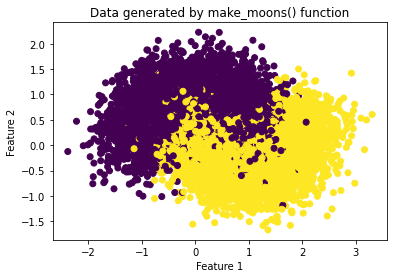

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Data generated by make_moons() function')

# b) Use train_test_split() to split the dataset into a training set and a test set.

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# c) Use grid search  to find good hyperparameter values for a DecisionTreeClassifier.

You can try the following hyperparameters:
```python
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
```

In [5]:
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)

grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [6]:
grid_search_cv.best_params_

{'max_leaf_nodes': 17, 'min_samples_split': 2}

# d) Train your model on the full training set using the best found model parameters and measure your model’s performance on the test set. You should get roughly 85% to 87% accuracy.

# OBS: By default, GridSearchCV trains the best model found on the whole training set since the hyperparameter refit has the default value True. 

Check the documentation: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html and look at the function parameter refit = True.

In [7]:
y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.8695